### Name:-Prachi Balaji Upare
### Roll no.:-2447053
### Batch:-C
### Practical No.1:-
To use PCA Algorithm for dimensionality reduction.You have a dataset that includes measurements for 
different variables on wine(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components    

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("Wine.csv")

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

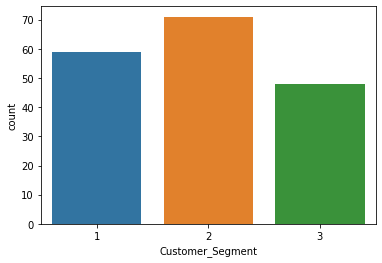

In [8]:
sns.countplot(x='Customer_Segment',data=data)

In [9]:
target=data['Customer_Segment']
data=data.drop('Customer_Segment',axis=1)

In [10]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.20,random_state=12)
x_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
41,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035


In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.28450633, -0.42172994, -0.56346482, ...,  0.87947767,
         0.72970278, -0.08358627],
       [ 1.7959078 , -0.36593586,  0.32319303, ...,  0.26219141,
         1.36583825,  1.79720822],
       [-0.38416688, -0.84018559, -1.20185848, ...,  0.08582391,
        -1.51122901, -0.94561708],
       ...,
       [-0.54611529, -0.95177376, -0.38613325, ..., -0.92828924,
        -1.62689001, -0.29256343],
       [ 0.27608431,  2.72133688, -0.13786905, ..., -1.58966738,
        -1.67026288, -0.04766832],
       [-1.6050087 , -0.35663684, -1.55652162, ...,  1.18812081,
        -0.71605967, -1.01745298]])

In [13]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [14]:
x_train.iloc[81]

0    -1.405688
1    -0.737896
2    -1.308257
3     0.340495
4    -0.910652
5    -0.501628
6    -0.423869
7    -0.501572
8    -0.102905
9    -1.287980
10   -0.046452
11    1.004398
12   -0.798680
Name: 81, dtype: float64

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred=model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report

In [19]:
y_actual=y_test
y_pred

array([3, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3], dtype=int64)

In [20]:
y_actual

160    3
156    3
78     2
45     1
112    2
168    3
7      1
153    3
103    2
150    3
137    3
161    3
124    2
83     2
149    3
23     1
1      1
5      1
21     1
152    3
11     1
14     1
93     2
64     2
47     1
12     1
77     2
92     2
62     2
40     1
8      1
63     2
42     1
166    3
15     1
173    3
Name: Customer_Segment, dtype: int64

In [21]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.91      0.95        11
           3       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



<AxesSubplot:>

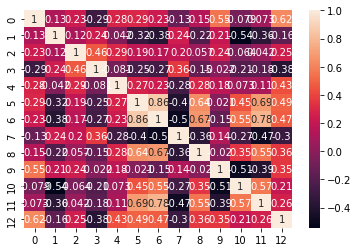

In [22]:
sns.heatmap(x_train.corr(),annot=True)

In [23]:
pca = PCA(n_components=2)
principal_comp1 = pca.fit_transform(x_train)
principal_comp2 = pca.fit_transform(x_test)

In [24]:
principal_comp1

array([[-9.60220620e-01,  1.37661234e+00],
       [-2.42530009e+00, -1.23017442e+00],
       [ 1.96733955e+00,  6.16496788e-01],
       [-9.51251080e-04,  1.15220462e+00],
       [-6.09309322e-01, -3.21338165e-01],
       [-2.56560022e+00, -1.80310461e+00],
       [-7.05068054e-01,  1.98167353e+00],
       [-2.00263605e+00, -1.66490389e+00],
       [-2.30867257e+00, -2.34471255e+00],
       [ 3.56879212e+00, -1.58250190e+00],
       [ 4.95893377e-01,  2.16611412e+00],
       [-2.57383431e+00, -1.32529656e+00],
       [ 1.82918771e+00,  9.21797684e-01],
       [ 2.43858969e+00, -2.43322759e+00],
       [-2.06697420e+00,  1.81955597e+00],
       [ 1.47618025e+00, -2.60164829e+00],
       [ 2.94629228e+00, -1.54181990e+00],
       [ 3.15660260e+00, -6.52329665e-01],
       [-1.38439716e+00,  6.87031574e-01],
       [-2.72500651e+00, -1.50578390e+00],
       [ 2.39627032e+00, -7.43509614e-01],
       [-2.03660409e+00, -1.65406399e+00],
       [ 2.53455268e-02,  2.19132518e+00],
       [ 1.

In [25]:
pc_model = LogisticRegression()
pc_model.fit(principal_comp1,y_train)

LogisticRegression()

In [26]:
y_predict=pc_model.predict(principal_comp2)

In [27]:
y_predict

array([3, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3], dtype=int64)

In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [29]:
principal_components = pca.components_
print("Principal Components:")
print(principal_components)

Principal Components:
[[-0.14067905  0.31993109  0.09290431  0.35367843 -0.02473001 -0.34130895
  -0.36115592  0.31689445 -0.20114095  0.1522117  -0.27887711 -0.39528538
  -0.3138881 ]
 [-0.53680044 -0.15301763 -0.20966357  0.02815284 -0.2316119  -0.04787013
  -0.02141232  0.06707401 -0.03041416 -0.55218445  0.26407493  0.13421415
  -0.43497675]]


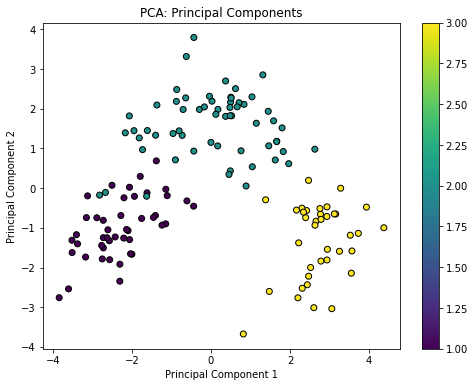

In [30]:
import matplotlib.pyplot as plt
# Create a scatter plot to visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_comp1[:, 0], principal_comp1[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components')
plt.colorbar()

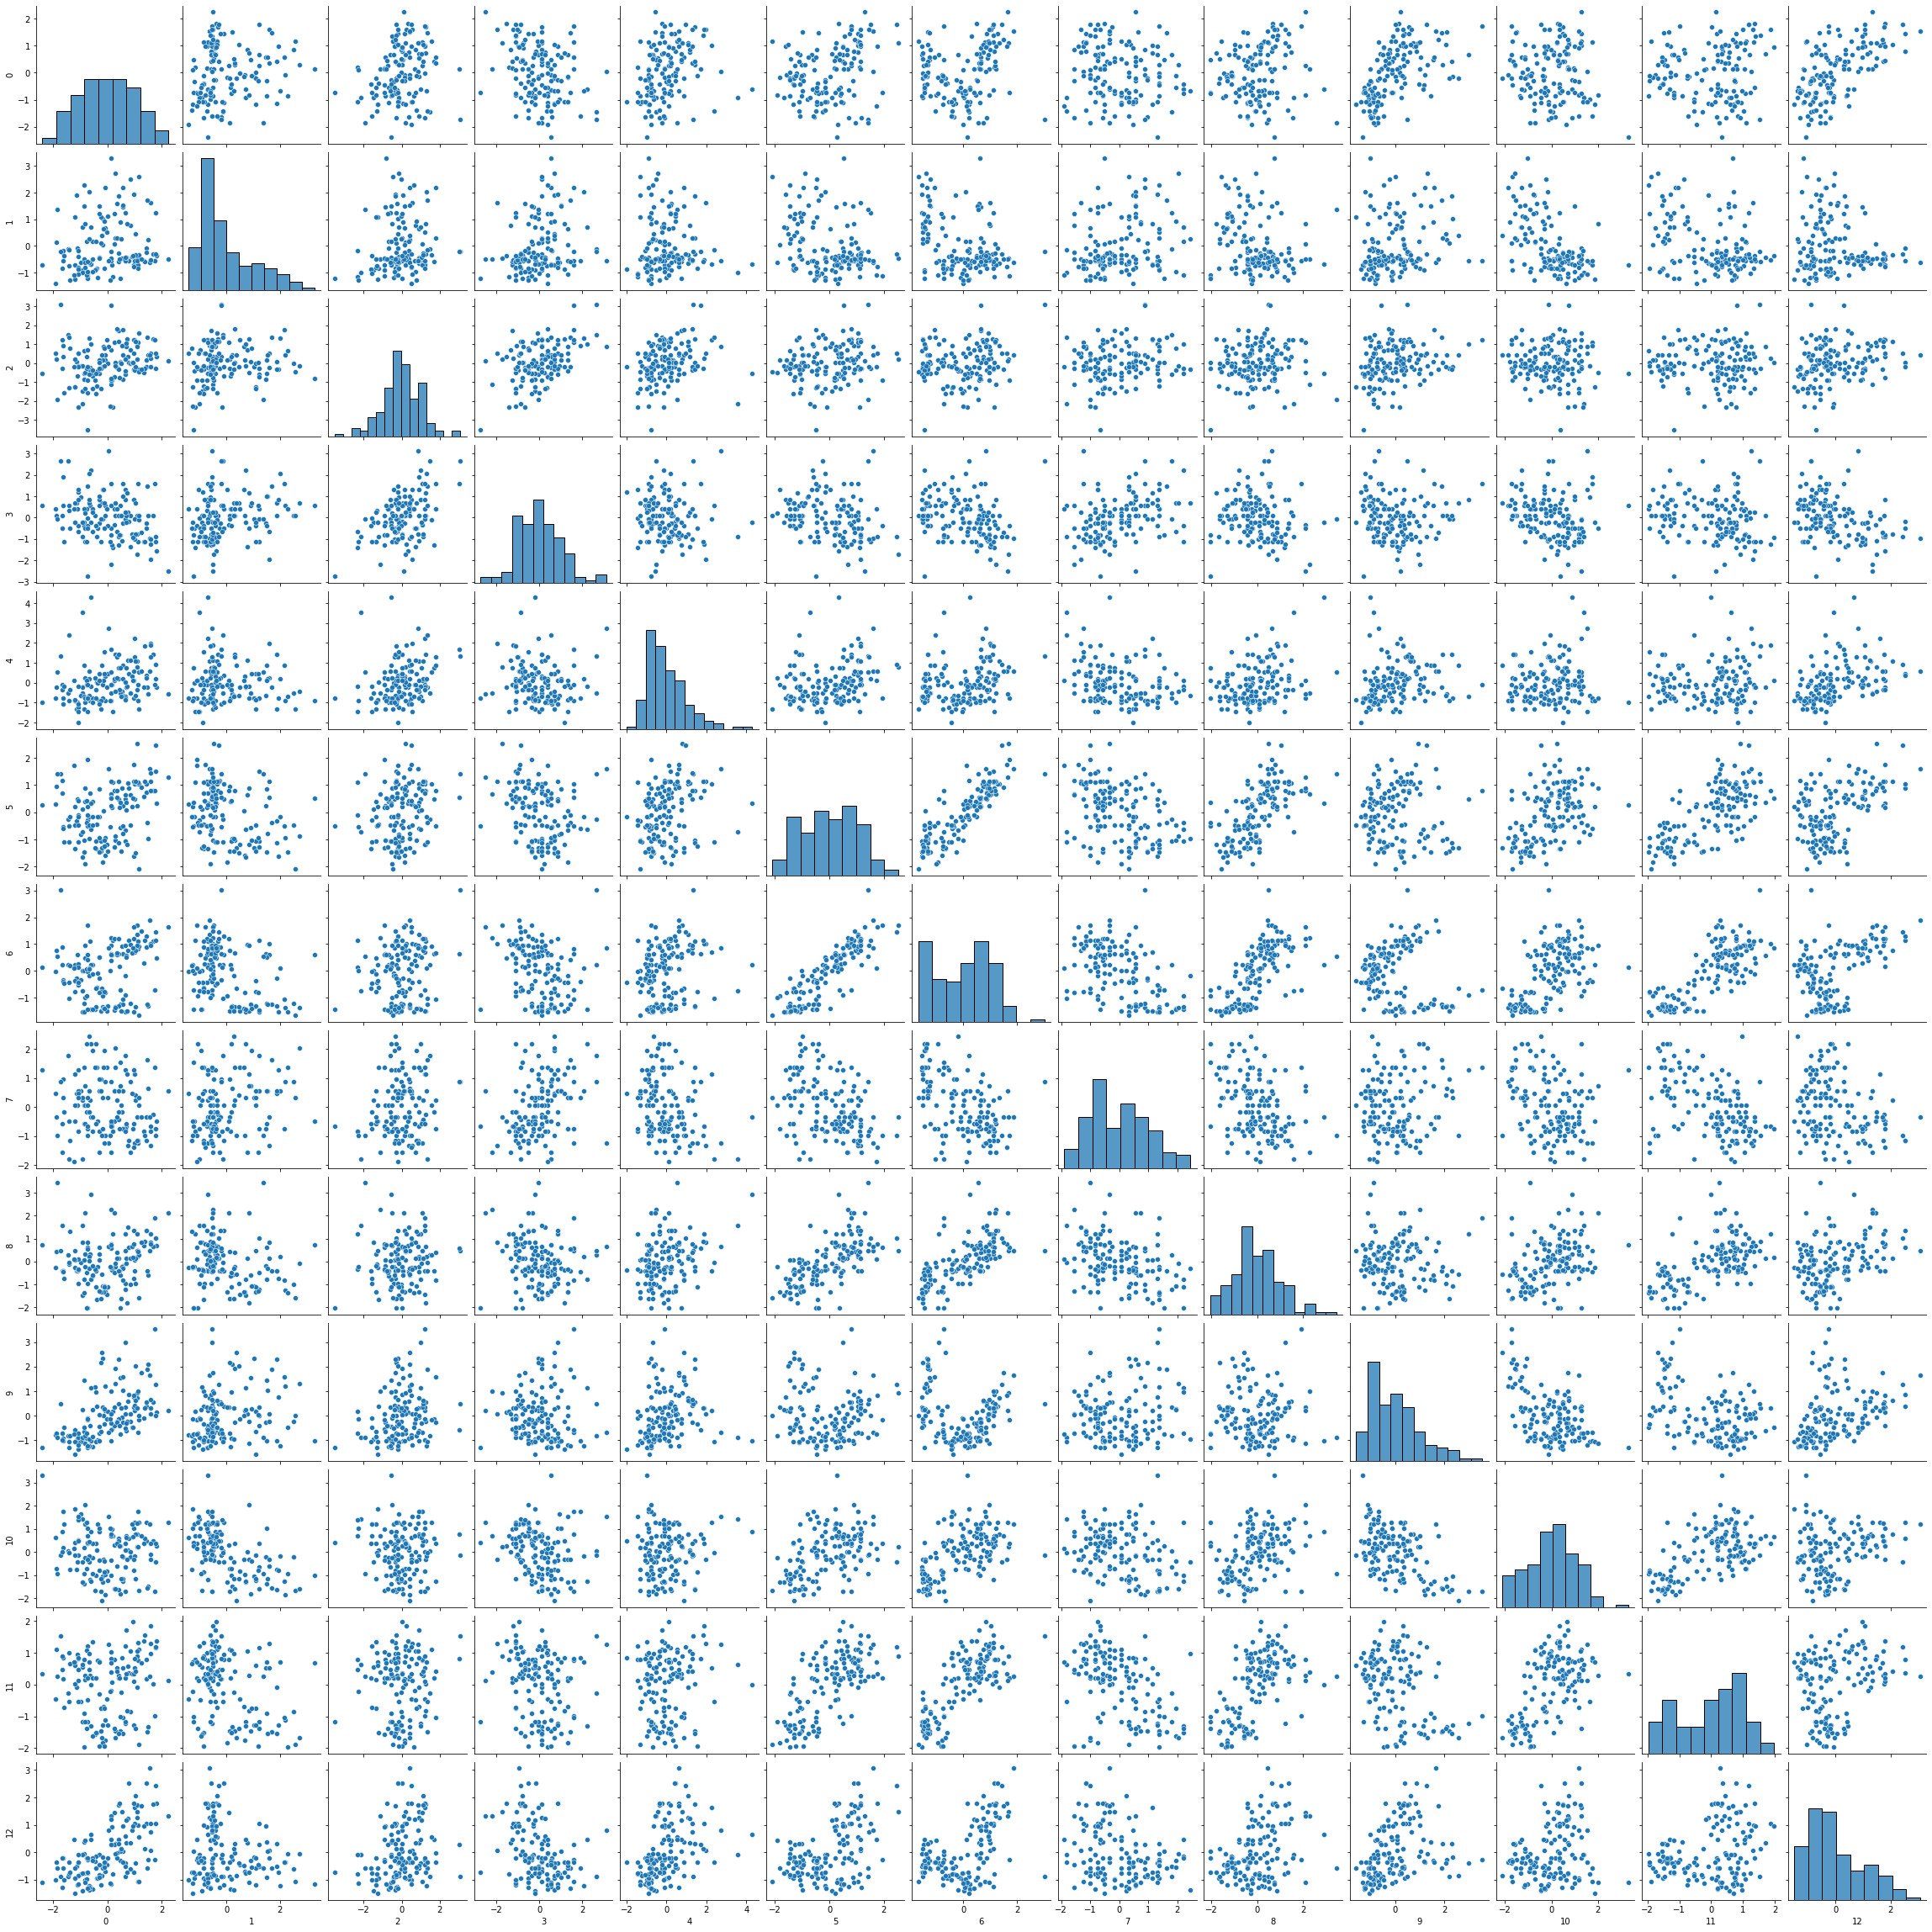

In [31]:
sns.pairplot(x_train)